In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
train=pd.read_csv('train.csv')
store=pd.read_csv('store.csv')

C:\Users\mowniesh\Anaconda7\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
train=train.merge(store, on='Store')

In [3]:
train.shape

(1017209, 18)

In [4]:
train.columns[train.isnull().any()]

Index(['CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear',
       'PromoInterval'],
      dtype='object')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
Store                        1017209 non-null int64
DayOfWeek                    1017209 non-null int64
Date                         1017209 non-null object
Sales                        1017209 non-null int64
Customers                    1017209 non-null int64
Open                         1017209 non-null int64
Promo                        1017209 non-null int64
StateHoliday                 1017209 non-null object
SchoolHoliday                1017209 non-null int64
StoreType                    1017209 non-null object
Assortment                   1017209 non-null object
CompetitionDistance          1014567 non-null float64
CompetitionOpenSinceMonth    693861 non-null float64
CompetitionOpenSinceYear     693861 non-null float64
Promo2                       1017209 non-null int64
Promo2SinceWeek              509178 non-null float64
Promo2SinceYear              509178 non-null f

In [6]:
numeric_cols = ['Store','Sales','Customers','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear',
                'Promo2SinceWeek']
categorical_cols = ['Open','Promo','StateHoliday','SchoolHolday','DayOfWeek','StoreType','Assortment','Promo2'
                    'Promo2SinceYear']
object_cols = ['Date','PromoInterval']

UNIVARIATE ANALYSIS

**NUMERICAL DATA ANALYSIS**

-0.0009548799809840643

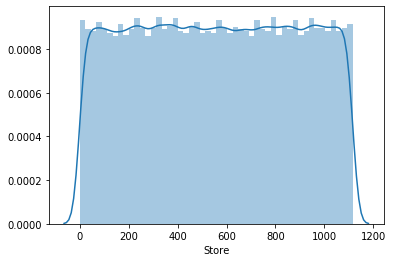

In [7]:
sns.distplot(train["Store"])
train['Store'].skew()

0.6414596158103798

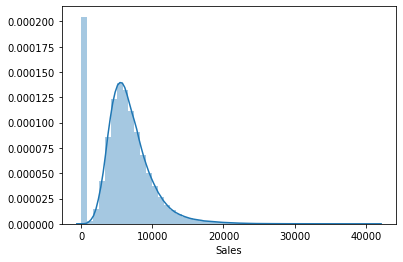

In [8]:
sns.distplot(train['Sales'])
train['Sales'].skew()

This data contain a days without sales is occurs in huge numbers and also during holiday and weekend days the stores are always closed.

1.598650289950892

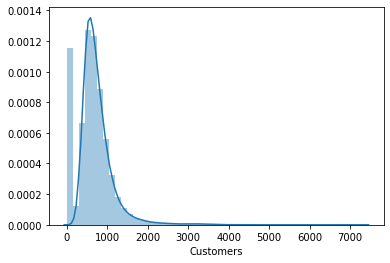

In [9]:
sns.distplot(train["Customers"])
train['Customers'].skew()

2.9285340174784116

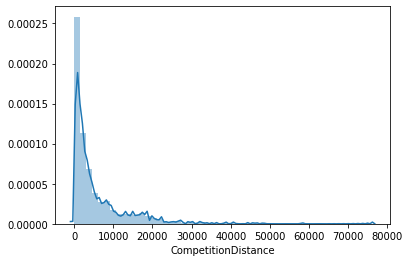

In [10]:
sns.distplot(train["CompetitionDistance"].fillna(0))
train['CompetitionDistance'].skew()

Missing values(NAN) are higher than the relating competition distance values

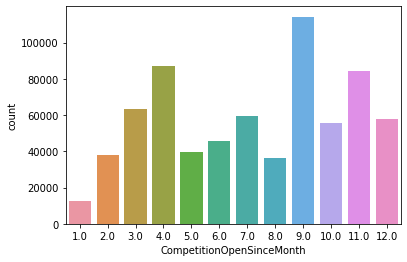

In [11]:
sns.countplot(train['CompetitionOpenSinceMonth'])

In [12]:
train[(train['CompetitionOpenSinceMonth'].isnull())].shape

(323348, 18)

In [13]:
train[(train['CompetitionDistance'].isnull())].shape

(2642, 18)

In [14]:
train[(train['CompetitionOpenSinceYear'].isnull())].shape

(323348, 18)

In [15]:
train[(train['CompetitionOpenSinceMonth'].isnull()& train['CompetitionOpenSinceYear'].isnull() & train['CompetitionDistance'].notnull())].head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
10362,12,5,7/31/2015,8959,962,1,1,0,1,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
10363,12,4,7/30/2015,7996,835,1,1,0,1,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
10364,12,3,7/29/2015,9236,989,1,1,0,1,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
10365,12,2,7/28/2015,8822,861,1,1,0,1,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
10366,12,1,7/27/2015,10227,979,1,1,0,1,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


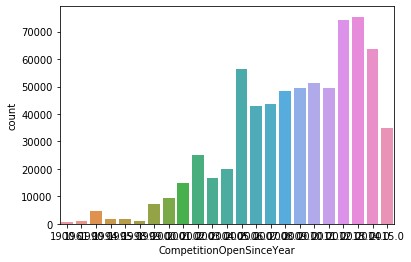

In [16]:
sns.countplot(train['CompetitionOpenSinceYear'])

In [17]:
train['Promo2SinceWeek'].unique()

array([nan, 13., 14.,  1., 45., 40., 26., 22.,  5.,  6., 10., 31., 37.,
        9., 39., 27., 18., 35., 23., 48., 36., 50., 44., 49., 28.])

#convert the float values in to integer.
#More number of null values are in this features


**Univariate-Categorical**

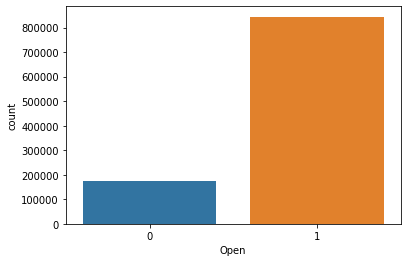

In [18]:
sns.countplot(train['Open'])

In [19]:
train[train['Open']==0].Sales.unique()

array([0], dtype=int64)

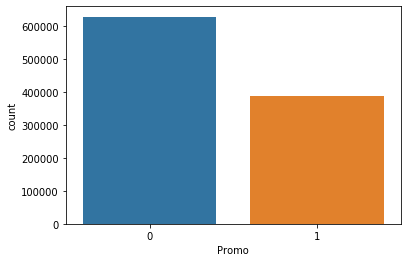

In [20]:
sns.countplot(train['Promo'])

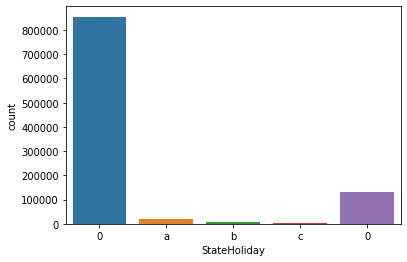

In [21]:
sns.countplot(train['StateHoliday'])

In [22]:
train[train['StateHoliday']== 0].shape

(131072, 18)

Here i need to mention that zero in this data is shown as both string and integer 

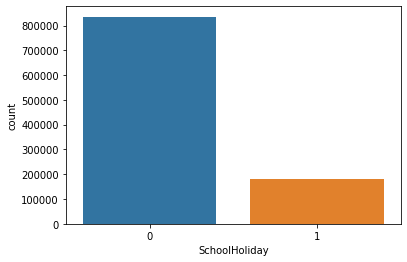

In [23]:
sns.countplot(train['SchoolHoliday'])

In [24]:
train[(train['SchoolHoliday']== 1)&(train['StateHoliday']=='a')].shape

(5205, 18)

In [25]:
from scipy import stats

In [26]:
stats.pointbiserialr(train['SchoolHoliday'], train['Sales'])

PointbiserialrResult(correlation=0.08512403767585179, pvalue=0.0)

0.0015928228042008977

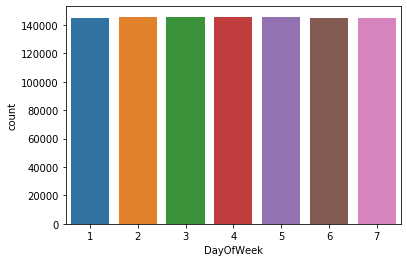

In [27]:
sns.countplot(train['DayOfWeek'])
train['DayOfWeek'].skew()

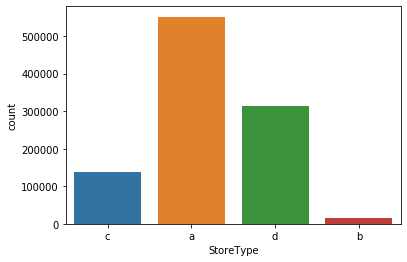

In [28]:
sns.countplot(train['StoreType'])

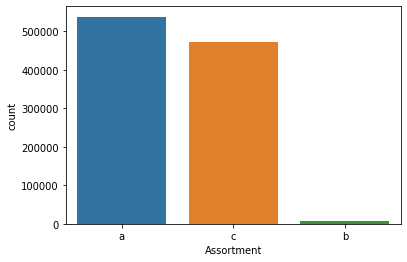

In [29]:
sns.countplot(train['Assortment'])

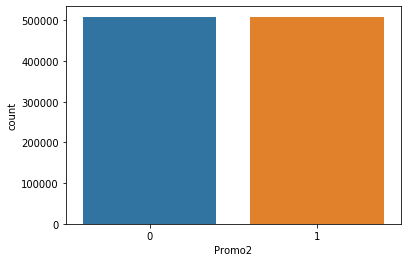

In [30]:
sns.countplot(train['Promo2'])

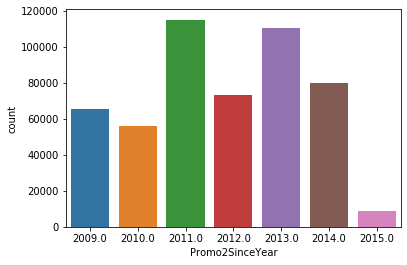

In [31]:
sns.countplot(train['Promo2SinceYear'])

In [32]:
train[train['Promo2']==0].shape

(508031, 18)

In [33]:
train[(train['Promo2SinceYear'].isnull())].shape

(508031, 18)

In [34]:
train[(train['Promo2SinceWeek'].isnull())].shape

(508031, 18)

In [35]:
train[(train['PromoInterval'].isnull())].shape

(508031, 18)

In [36]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,7/31/2015,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,7/30/2015,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,7/29/2015,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,7/28/2015,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,7/27/2015,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


**UNIVARIATE-Objects**

In [37]:
train['Date'] = pd.to_datetime(train['Date'])

In [38]:
train['year'] = train['Date'].dt.year
train['month'] = train['Date'].dt.month
train['date'] = train['Date'].dt.day
train['dayofweek']=train['Date'].dt.day_name()
train['weekofyear'] = train['Date'].dt.week

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
Store                        1017209 non-null int64
DayOfWeek                    1017209 non-null int64
Date                         1017209 non-null datetime64[ns]
Sales                        1017209 non-null int64
Customers                    1017209 non-null int64
Open                         1017209 non-null int64
Promo                        1017209 non-null int64
StateHoliday                 1017209 non-null object
SchoolHoliday                1017209 non-null int64
StoreType                    1017209 non-null object
Assortment                   1017209 non-null object
CompetitionDistance          1014567 non-null float64
CompetitionOpenSinceMonth    693861 non-null float64
CompetitionOpenSinceYear     693861 non-null float64
Promo2                       1017209 non-null int64
Promo2SinceWeek              509178 non-null float64
Promo2SinceYear              509178 no

In [40]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,date,dayofweek,weekofyear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,2015,7,31,Friday,31
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,2015,7,30,Thursday,31
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,2015,7,29,Wednesday,31
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,2015,7,28,Tuesday,31
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,2015,7,27,Monday,31


In [41]:
train['weekofyear'].unique()

array([31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15,
       14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1, 52, 51, 50,
       49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33,
       32], dtype=int64)

**Bivariate Analysis**

In [42]:
train[(train['Sales']==0)&(train['Customers']>=1)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,date,dayofweek,weekofyear
864013,948,4,2013-04-25,0,5,1,1,0,0,b,...,NaN,0,NaN,NaN,NaN,2013,4,25,Thursday,17
1003331,1100,2,2014-04-29,0,3,1,1,0,0,a,...,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2014,4,29,Tuesday,18


This is the exceptional case from the data and that affect accuracy of the model,so drop this rows is a best idea ..

In [43]:
train.drop([864013,1003331],inplace=True)

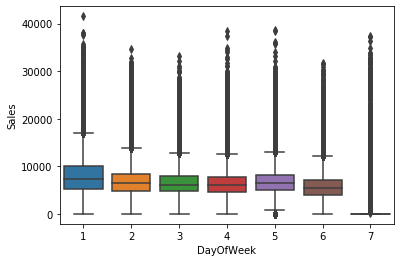

In [44]:
sns.boxplot(x='DayOfWeek', y='Sales', data=train)

In [45]:
train[(train['Sales']>0)& (train['DayOfWeek']==7)].shape

(3593, 23)

In [46]:
train[(train['Sales'])& (train['DayOfWeek']==7)].shape

(1791, 23)

Eventhough Sunday is a Holiday,considerable number of the Stores open and sell their drugs......

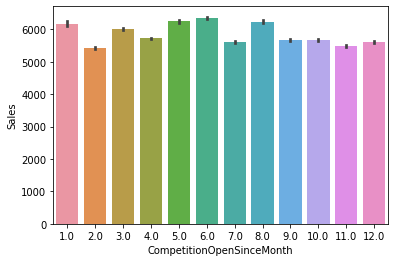

In [47]:
sns.barplot(x='CompetitionOpenSinceMonth',y='Sales',data=train)

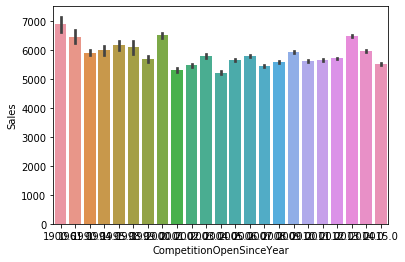

In [48]:
sns.barplot(x='CompetitionOpenSinceYear',y='Sales',data=train)

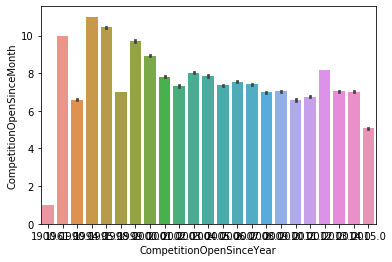

In [49]:
sns.barplot(x='CompetitionOpenSinceYear',y='CompetitionOpenSinceMonth',data=train)

Maximum no of competition are open in the middle months of every year

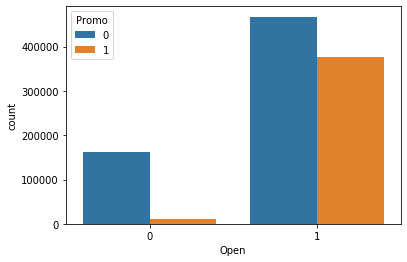

In [50]:
sns.countplot(x='Open',hue='Promo', data=train)

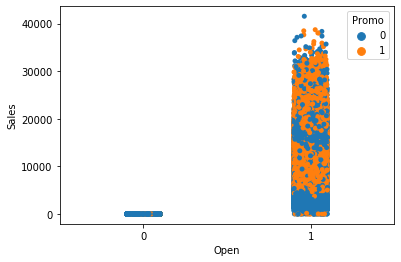

In [51]:
sns.stripplot(x='Open',y='Sales', hue='Promo', data=train)

In [52]:
train[(train['Open']==0)& (train['Promo']==1)].shape

(11184, 23)

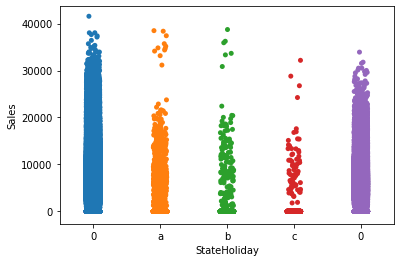

In [53]:
sns.stripplot(x='StateHoliday',y='Sales', data=train)

In [54]:
train[(train['Sales'])& (train['StateHoliday']=='c')].shape

(36, 23)

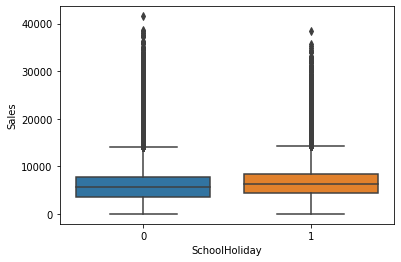

In [55]:
sns.boxplot(x='SchoolHoliday',y='Sales',data=train)

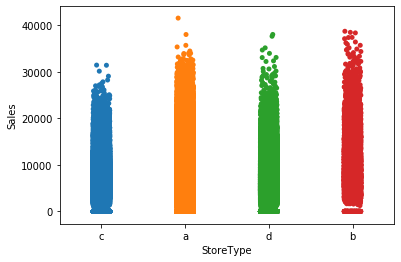

In [56]:
sns.stripplot(x='StoreType',y='Sales',data=train)

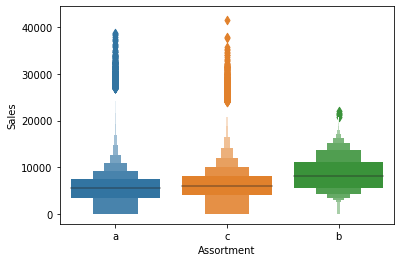

In [57]:
sns.boxenplot(x='Assortment',y='Sales',data=train)

how many variations of a particular product a store carries that is mentioned in the assortment level..

In [58]:
train[(train['Sales']>0)& (train['StateHoliday']=='a')]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,date,dayofweek,weekofyear
1243,2,5,2014-10-03,2689,389,1,1,a,0,a,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2014,10,3,Friday,40
1608,2,4,2013-10-03,2656,381,1,0,a,0,a,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2013,10,3,Thursday,40
3825,5,4,2015-06-04,5807,625,1,1,a,0,a,...,2015.0,0,NaN,NaN,NaN,2015,6,4,Thursday,23
4175,5,4,2014-06-19,5307,574,1,1,a,0,a,...,2015.0,0,NaN,NaN,NaN,2014,6,19,Thursday,25
4560,5,4,2013-05-30,5065,576,1,1,a,0,a,...,2015.0,0,NaN,NaN,NaN,2013,5,30,Thursday,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002744,1099,4,2013-05-09,3733,663,1,0,a,0,a,...,2013.0,1,14.0,2013.0,"Jan,Apr,Jul,Oct",2013,5,9,Thursday,19
1009630,1107,4,2013-08-15,6138,649,1,1,a,1,a,...,2012.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2013,8,15,Thursday,33
1009914,1108,4,2015-06-04,7404,693,1,1,a,0,a,...,2004.0,0,NaN,NaN,NaN,2015,6,4,Thursday,23
1010264,1108,4,2014-06-19,7037,703,1,1,a,0,a,...,2004.0,0,NaN,NaN,NaN,2014,6,19,Thursday,25


In [59]:
train['CompetitionOpenSinceMonth'].unique()

array([ 9., 11., 12.,  4., 10.,  8., nan,  3.,  6.,  5.,  1.,  2.,  7.])

In [60]:
train['CompetitionOpenSinceYear'].unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
         nan, 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

In [61]:
train['CompetitionOpenSinceMonth'].mode()

0    9.0
dtype: float64

In [62]:
train['CompetitionOpenSinceYear'].median()

2010.0

In [63]:
train['CompetitionDistance'].mean()

5430.094414847743

In [64]:
train.groupby(['CompetitionDistance', (train['CompetitionOpenSinceYear'].isnull())]).CompetitionDistance.size()

CompetitionDistance  CompetitionOpenSinceYear
20.0                 True                         942
30.0                 False                       3767
40.0                 False                       4710
50.0                 False                       3768
                     True                        3768
                                                 ... 
45740.0              False                        942
46590.0              False                        942
48330.0              False                        942
58260.0              False                        942
75860.0              True                         942
Name: CompetitionDistance, Length: 788, dtype: int64

In [65]:
train.loc[(train['CompetitionDistance']>= 1) & (train['CompetitionOpenSinceMonth'].isnull()), 'CompetitionOpenSinceMonth'] = 9
train.loc[(train['CompetitionDistance']>= 1) & (train['CompetitionOpenSinceYear'].isnull()), 'CompetitionOpenSinceYear'] = 2010

In [66]:
train[(train['CompetitionOpenSinceMonth'].isnull())].shape

(2642, 23)

In [67]:
train[(train['CompetitionOpenSinceYear'].isnull())].shape

(2642, 23)

In [68]:
train[(train['CompetitionDistance'].isnull())].shape

(2642, 23)

In [69]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,date,dayofweek,weekofyear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,2015,7,31,Friday,31
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,2015,7,30,Thursday,31
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,2015,7,29,Wednesday,31
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,2015,7,28,Tuesday,31
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,2015,7,27,Monday,31


In [70]:
train[(train['CompetitionOpenSinceMonth']==9) & (train['CompetitionOpenSinceYear']==2010)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,date,dayofweek,weekofyear
10362,12,5,2015-07-31,8959,962,1,1,0,1,a,...,2010.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,Friday,31
10363,12,4,2015-07-30,7996,835,1,1,0,1,a,...,2010.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,30,Thursday,31
10364,12,3,2015-07-29,9236,989,1,1,0,1,a,...,2010.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,29,Wednesday,31
10365,12,2,2015-07-28,8822,861,1,1,0,1,a,...,2010.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,28,Tuesday,31
10366,12,1,2015-07-27,10227,979,1,1,0,1,a,...,2010.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,27,Monday,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,...,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,5,Saturday,1
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,...,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,4,Friday,1
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,...,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,3,Thursday,1
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,...,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,2,Wednesday,1


In [71]:
train[(train['CompetitionDistance'].isnull())].shape

(2642, 23)

MULTIAVARIATE ANALYSIS

In [72]:
train.groupby('StoreType')['Customers', 'Sales'].sum()

,Customers,Sales
StoreType,,
a,363541431,3165334859
b,31465616,159231395
c,92129705,783221426
d,156904995,1765392943


#####DATA TRANSFORMATION#######

In [73]:
train.loc[(train['StateHoliday'] == '0') ,'StateHoliday'] =0

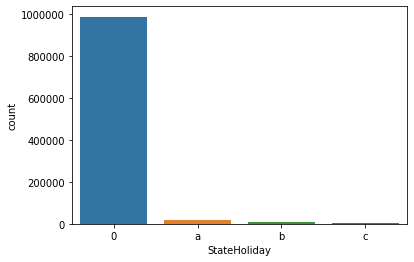

In [74]:
sns.countplot(train['StateHoliday'])

In [75]:
train['CompetitionOpen'] = 12 * (train.year - train.CompetitionOpenSinceYear) + (train.month - train.CompetitionOpenSinceMonth)

8.957190838567401

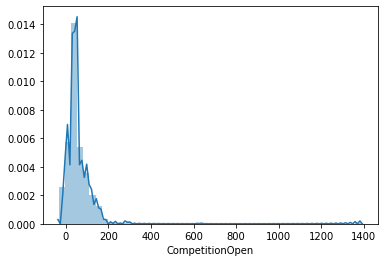

In [76]:
sns.distplot(train["CompetitionOpen"].fillna(0))
train['CompetitionOpen'].skew()

In [77]:
train['CompetitionOpen'].fillna(-1,inplace=True)

In [78]:
train['CompetitionOpen'].unique()

array([ 8.200e+01,  8.100e+01,  8.000e+01,  7.900e+01,  7.800e+01,
        7.700e+01,  7.600e+01,  7.500e+01,  7.400e+01,  7.300e+01,
        7.200e+01,  7.100e+01,  7.000e+01,  6.900e+01,  6.800e+01,
        6.700e+01,  6.600e+01,  6.500e+01,  6.400e+01,  6.300e+01,
        6.200e+01,  6.100e+01,  6.000e+01,  5.900e+01,  5.800e+01,
        5.700e+01,  5.600e+01,  5.500e+01,  5.400e+01,  5.300e+01,
        5.200e+01,  9.200e+01,  9.100e+01,  9.000e+01,  8.900e+01,
        8.800e+01,  8.700e+01,  8.600e+01,  8.500e+01,  8.400e+01,
        8.300e+01,  1.030e+02,  1.020e+02,  1.010e+02,  1.000e+02,
        9.900e+01,  9.800e+01,  9.700e+01,  9.600e+01,  9.500e+01,
        9.400e+01,  9.300e+01,  5.100e+01,  5.000e+01,  4.900e+01,
        4.800e+01,  4.700e+01,  4.600e+01,  4.500e+01,  4.400e+01,
        4.300e+01,  4.200e+01,  4.100e+01,  4.000e+01,  3.000e+00,
        2.000e+00,  1.000e+00,  0.000e+00, -1.000e+00, -2.000e+00,
       -3.000e+00, -4.000e+00, -5.000e+00, -6.000e+00, -7.000e

In [79]:
train[(train['CompetitionOpen'].isnull())].shape

(0, 24)

In [80]:
train['PromoOpen'] = 12 * (train.year - train.Promo2SinceYear) + (train.weekofyear - train.Promo2SinceWeek) / 4.0

In [81]:
train['PromoOpen'].fillna(-1,inplace=True)

1.0845082546709497

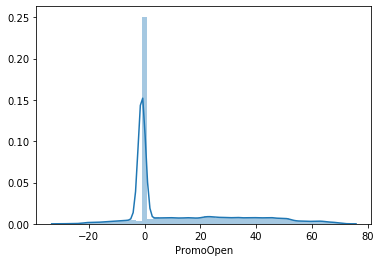

In [82]:
sns.distplot(train["PromoOpen"])
train['PromoOpen'].skew()

In [83]:
train['PromoOpen'].unique()

array([ -1.  ,  64.5 ,  64.25,  64.  ,  63.75,  63.5 ,  63.25,  63.  ,
        62.75,  62.5 ,  62.25,  62.  ,  61.75,  61.5 ,  61.25,  61.  ,
        60.75,  60.5 ,  60.25,  60.  ,  59.75,  59.5 ,  59.25,  59.  ,
        58.75,  58.5 ,  58.25,  58.  ,  57.75,  57.5 ,  57.25,  57.  ,
        45.  ,  56.75,  56.5 ,  56.25,  56.  ,  55.75,  55.5 ,  55.25,
        55.  ,  54.75,  54.5 ,  54.25,  54.  ,  53.75,  53.5 ,  53.25,
        53.  ,  52.75,  52.5 ,  52.25,  52.  ,  51.75,  51.5 ,  51.25,
        51.  ,  50.75,  50.5 ,  50.25,  50.  ,  49.75,  49.5 ,  49.25,
        49.  ,  48.75,  48.5 ,  48.25,  48.  ,  47.75,  47.5 ,  47.25,
        47.  ,  46.75,  46.5 ,  46.25,  46.  ,  45.75,  45.5 ,  45.25,
        33.  ,  44.75,  44.5 ,  44.25,  44.  ,  43.75,  43.5 ,  43.25,
        43.  ,  42.75,  42.5 ,  42.25,  42.  ,  41.75,  41.5 ,  41.25,
        41.  ,  40.75,  40.5 ,  40.25,  40.  ,  39.75,  39.5 ,  39.25,
        39.  ,  38.75,  38.5 ,  38.25,  38.  ,  37.75,  37.5 ,  37.25,
      

In [84]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,date,dayofweek,weekofyear,CompetitionOpen,PromoOpen
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,NaN,NaN,NaN,2015,7,31,Friday,31,82.0,-1.0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,NaN,NaN,NaN,2015,7,30,Thursday,31,82.0,-1.0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,NaN,NaN,NaN,2015,7,29,Wednesday,31,82.0,-1.0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,NaN,NaN,NaN,2015,7,28,Tuesday,31,82.0,-1.0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,NaN,NaN,NaN,2015,7,27,Monday,31,82.0,-1.0


In [85]:
train.loc[(train['StateHoliday'] == 'a') ,'StateHoliday'] =1
train.loc[(train['StateHoliday'] == 'b') ,'StateHoliday'] =2
train.loc[(train['StateHoliday'] == 'c') ,'StateHoliday'] =3

In [86]:
train['CompetitionDistance'].fillna(0,inplace=True)

In [87]:
train['CompetitionDistance']=train['CompetitionDistance'].astype(int)

In [88]:
#train.loc[(train['StoreType'] == 'a') ,'StoreType'] =1
#train.loc[(train['StoreType'] == 'b') ,'StoreType'] =2
#train.loc[(train['StoreType'] == 'c') ,'StoreType'] =3
#train.loc[(train['StoreType'] == 'd') ,'StoreType'] =4

In [89]:
#train.loc[(train['Assortment'] == 'a') ,'Assortment'] =1
#train.loc[(train['Assortment'] == 'b') ,'Assortment'] =2
#train.loc[(train['Assortment'] == 'c') ,'Assortment'] =3

In [90]:
train.drop(columns=['Date'],inplace=True)
train.drop(columns=['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear'],inplace=True)
train.drop(columns=['Customers','dayofweek'],inplace=True)
train.drop(columns=['SchoolHoliday'],inplace=True)
train.drop(columns=['StateHoliday'],inplace=True)
train.drop(columns=['year'],inplace=True)


In [91]:
train=pd.get_dummies(train, columns=['PromoInterval', 'StoreType','Assortment'])

In [92]:
train.drop(columns=['weekofyear'],inplace=True)

In [93]:
train.head()

,Store,DayOfWeek,Sales,Open,Promo,CompetitionDistance,Promo2,month,date,CompetitionOpen,...,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,5,5263,1,1,1270,0,7,31,82.0,...,0,0,0,0,0,1,0,1,0,0
1,1,4,5020,1,1,1270,0,7,30,82.0,...,0,0,0,0,0,1,0,1,0,0
2,1,3,4782,1,1,1270,0,7,29,82.0,...,0,0,0,0,0,1,0,1,0,0
3,1,2,5011,1,1,1270,0,7,28,82.0,...,0,0,0,0,0,1,0,1,0,0
4,1,1,6102,1,1,1270,0,7,27,82.0,...,0,0,0,0,0,1,0,1,0,0


In [94]:
from sklearn.preprocessing import power_transform
train['Sales'] = power_transform(train[['Sales']], method='yeo-johnson')
train['Sales'].skew()

-0.9548093839728222

In [95]:
train['Sales'] = power_transform(train[['Sales']], method='yeo-johnson')

In [96]:
from sklearn.preprocessing import power_transform
train['CompetitionOpen'] = power_transform(train[['CompetitionOpen']], method='yeo-johnson')
train['CompetitionOpen'].skew()

1.9800157155478788

In [97]:
train['CompetitionOpen'] = power_transform(train[['CompetitionOpen']], method='yeo-johnson')

In [98]:
from sklearn.preprocessing import power_transform
train['PromoOpen'] = power_transform(train[['PromoOpen']], method='yeo-johnson')
train['PromoOpen'].skew()

-0.8127961760335409

In [99]:
train['PromoOpen'] = power_transform(train[['PromoOpen']], method='yeo-johnson')

In [100]:
from sklearn.preprocessing import power_transform
train['CompetitionDistance'] = power_transform(train[['CompetitionDistance']], method='yeo-johnson')
train['CompetitionDistance'].skew()

-0.027324687737333906

In [101]:
train['CompetitionDistance'] = power_transform(train[['CompetitionDistance']], method='yeo-johnson')

In [102]:
train['CompetitionDistance'].skew()

-0.012569962899958492

In [103]:
targets = train['Sales']
train.drop(columns=['Sales'], inplace=True)

In [104]:
train.head()

,Store,DayOfWeek,Open,Promo,CompetitionDistance,Promo2,month,date,CompetitionOpen,PromoOpen,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,5,1,1,-0.396862,0,7,31,0.639242,-0.528691,0,0,0,0,0,1,0,1,0,0
1,1,4,1,1,-0.396862,0,7,30,0.639242,-0.528691,0,0,0,0,0,1,0,1,0,0
2,1,3,1,1,-0.396862,0,7,29,0.639242,-0.528691,0,0,0,0,0,1,0,1,0,0
3,1,2,1,1,-0.396862,0,7,28,0.639242,-0.528691,0,0,0,0,0,1,0,1,0,0
4,1,1,1,1,-0.396862,0,7,27,0.639242,-0.528691,0,0,0,0,0,1,0,1,0,0


In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, targets, test_size=0.3, random_state=9)
print(X_train.shape)
print(X_test.shape)

(712044, 20)
(305163, 20)


In [106]:
from sklearn.ensemble import RandomForestRegressor

In [107]:
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(X_train, y_train)
 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [108]:
from sklearn.metrics import mean_squared_error
train_pred = regressor.predict(X_train)
mean_squared_error(y_train, train_pred)

0.008852540466169368

In [109]:
from sklearn.metrics import mean_squared_error

y_pred = regressor.predict(X_test)
mean_squared_error(y_test, y_pred)

0.0481959798794653

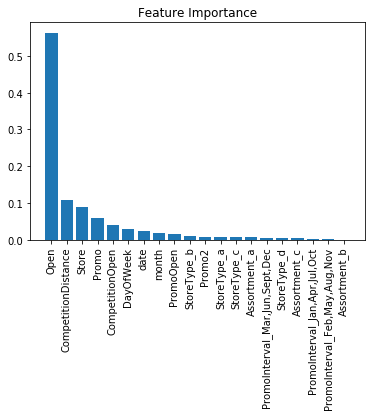

In [110]:
importances =regressor.feature_importances_
#Visalize feature importances
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]
# Create plot
plt.figure()
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)
# Show plot
plt.show()